EDA(1)


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Let us read in the `train` and `test` datasets.

In [2]:
train = pd.read_parquet('../input/otto-full-optimized-memory-footprint/train.parquet')
test = pd.read_parquet('../input/otto-full-optimized-memory-footprint/test.parquet')

Let us also read in the pickle file that will allow us to decipher the `type` information that has been encoded as integers to conserve memory.

In [3]:
!pip install pickle5

import pickle5 as pickle

with open('../input/otto-full-optimized-memory-footprint/id2type.pkl', "rb") as fh:
    id2type = pickle.load(fh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [4]:
train.shape, test.shape

((216716096, 4), (6928123, 4))

The `train` dataset contains 216716096 datapoints with `test` containing only 6928123.

Proportion of `test` to `train`:

In [5]:
test.shape[0]/train.shape[0]

0.03196865912534711

The size of the test set is ~3.1% of the train set.

In [6]:
train.head()

,session,aid,ts,type
0,0,1517085,1659304800,0
1,0,1563459,1659304904,0
2,0,1309446,1659367439,0
3,0,16246,1659367719,0
4,0,1781822,1659367871,0


In [7]:
train.session.unique().shape[0], test.session.unique().shape[0]

(12899779, 1671803)

In [8]:
test.session.unique().shape[0]/train.session.unique().shape[0]

0.12959935205091497

<AxesSubplot:>

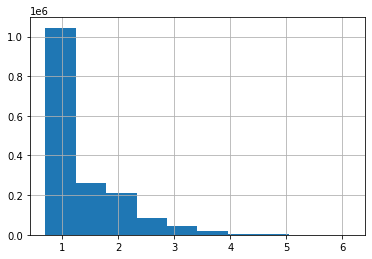

In [9]:
test.groupby('session')['aid'].count().apply(np.log1p).hist()

<AxesSubplot:>

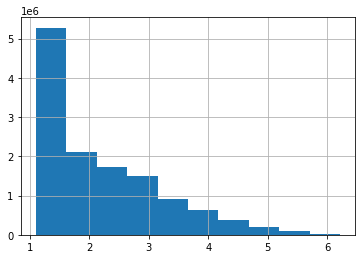

In [10]:
train.groupby('session')['aid'].count().apply(np.log1p).hist()

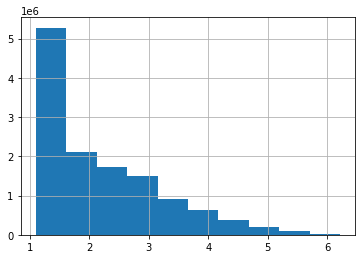](http://)

In [11]:
train.ts

0            1659304800
1            1659304904
2            1659367439
3            1659367719
4            1659367871
                ...    
216716091    1661723987
216716092    1661723976
216716093    1661723986
216716094    1661723983
216716095    1661723994
Name: ts, Length: 216716096, dtype: int32

In [12]:
import datetime

datetime.datetime.fromtimestamp(train.ts.min()/1000), datetime.datetime.fromtimestamp(train.ts.max()/1000)

(datetime.datetime(1970, 1, 20, 4, 55, 4, 800000),
 datetime.datetime(1970, 1, 20, 5, 35, 23, 999000))

In [13]:
import datetime

datetime.datetime.fromtimestamp(test.ts.min()/1000), datetime.datetime.fromtimestamp(test.ts.max()/1000)

(datetime.datetime(1970, 1, 20, 5, 35, 24),
 datetime.datetime(1970, 1, 20, 5, 45, 28, 791000))

In [14]:
len(set(test.aid.tolist()) - set(train.aid.tolist()))

0

no new items in the test set! 

In [15]:
train.groupby('session')['aid'].count().describe()

count    1.289978e+07
mean     1.679999e+01
std      3.357738e+01
min      2.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.500000e+01
max      5.000000e+02
Name: aid, dtype: float64

In [16]:
test.groupby('session')['aid'].count().describe()

count    1.671803e+06
mean     4.144103e+00
std      8.215717e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      4.580000e+02
Name: aid, dtype: float64

In [17]:
train.session.max(), test.session.min()

(12899778, 12899779)

 We see that the `session_ids` are not overlapping between `train` and `test` so it will be impossible to map the users (even if we have seen them before in train). We have to assume each session is from a different user.
